In [59]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as mtick
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Financial Data Analysis
import yfinance as yf
import ta
import quantstats as qs

# Machine Learning Metrics
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

# Models
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Importance
from sklearn.inspection import permutation_importance

# Hyperparameter Tuning
import optuna

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [60]:

dados = pd.read_excel(r'C:\Users\lauro.telles\Desktop\Web Scrapping\Modelo Preditivo cotações\Dados Intraday Brasil DOL  e  INDICE.xlsx',1)

dados




,Data,Abertura,Máxima,Mínima,Fechamento,Bandas de Bollinger A [20],Bandas de Bollinger A [20].1,Média Móvel A [9],Média Móvel A [20],Média Móvel A [50],IFR (RSI) [9],"MACD Linha (26,12) & Histograma (26,12,9)","MACD Linha (26,12) & Histograma (26,12,9).1",Média Móvel E [9],Volume Financeiro
0,2024-03-21 09:25:00,130120.0,130185.0,130120.0,130155.0,130498.56,130040.94,130303.89,130269.75,129950.1,41.02,74.23,-51.05,125.28,1.307228e+09
1,2024-03-21 09:20:00,130245.0,130250.0,130100.0,130125.0,130505.56,130025.44,130325.00,130265.50,129930.2,38.89,91.61,-46.43,138.04,2.606401e+09
2,2024-03-21 09:15:00,130240.0,130280.0,130145.0,130250.0,130508.35,130019.15,130347.78,130263.75,129909.1,48.65,113.49,-36.16,149.65,1.939980e+09
3,2024-03-21 09:10:00,130255.0,130285.0,130225.0,130245.0,130510.37,130003.13,130356.67,130256.75,129886.6,48.19,127.03,-31.65,158.69,3.207255e+09
4,2024-03-21 09:05:00,130300.0,130350.0,130200.0,130250.0,130510.79,129990.71,130368.89,130250.75,129864.1,48.58,142.98,-23.62,166.60,4.015614e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,2023-11-09 10:35:00,124340.0,124340.0,124340.0,124340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001400e+05
7453,2023-11-09 10:20:00,124490.0,124490.0,124490.0,124490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.498000e+04
7454,2023-11-09 10:05:00,124530.0,124530.0,124530.0,124530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.460400e+04
7455,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.979600e+04


In [61]:
candle_stick = go.Candlestick(x=dados['Data'],
                              open=dados['Abertura'],
                              high=dados['Máxima'],
                              low=dados['Mínima'],
                              close=dados['Fechamento'],
                              increasing=dict(line=dict(color='black')),
                              decreasing=dict(line=dict(color='red')),
                              showlegend=False)

fig = go.Figure(data=[candle_stick])

fig.show()


In [62]:
dados_invertidos = dados[::-1].reset_index(drop='index')
dados_invertidos.dropna()

train = dados_invertidos

candle_stick = go.Candlestick(x=dados_invertidos['Data'],
                              open=dados_invertidos['Abertura'],
                              high=dados_invertidos['Máxima'],
                              low=dados_invertidos['Mínima'],
                              close=dados_invertidos['Fechamento'],
                              increasing=dict(line=dict(color='black')),
                              decreasing=dict(line=dict(color='red')),
                              showlegend=False)

fig = go.Figure(data=[candle_stick])

fig.show()




In [63]:

scaler = MinMaxScaler(feature_range=(0,1))
data = dados_invertidos.iloc[:,0]
dados_invertidos = dados_invertidos.iloc[:,1:]
dados_invertidos=dados_invertidos.iloc[:,[3,1,2,3,4,5,6,7,8,9,10,11,12,13]].dropna()

train = dados_invertidos.iloc[:5279,:]
teste = dados_invertidos.iloc[5279:,:]









train_scaled=scaler.fit_transform(train)
test_scaled = scaler.fit_transform(teste)


In [64]:
X_train = train_scaled[:,1:]
y_train = train_scaled[:,0]

X_test = test_scaled[:,1:]
y_test = test_scaled[:,0]

  
  
  
  





In [65]:
k_best = SelectKBest(score_func= f_regression, k=13)

X_train_k_best = k_best.fit_transform(X_train,y_train)


feature_indices = k_best.get_support(indices=True)
features_names = X_train.columns[feature_indices]

p_values = k_best.pvalues_

features = []

for feature, p_value in zip(features_names,p_values):
    if p_value<0.2:
        features.append(feature)

X_train_kbest = X_train[features]
      

print("selected features:")
print(features)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
regressors = [LinearRegression(),
                Ridge(random_state=42),
                ExtraTreesRegressor(random_state=42),
                GradientBoostingRegressor(random_state=42),
                KNeighborsRegressor(),
                XGBRegressor(),
                LGBMRegressor(random_state=42),
                CatBoostRegressor(random_state=42),
                AdaBoostRegressor(random_state=42),
                RandomForestRegressor(random_state=42)
                ]


for reg in regressors:
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    print(f'{type(reg).__name__}: R² = {r2:.2f}, Root Mean Squared Error = {rmse:.2f}')






LinearRegression: R² = 1.00, Root Mean Squared Error = 0.00
Ridge: R² = 0.99, Root Mean Squared Error = 0.02
ExtraTreesRegressor: R² = 1.00, Root Mean Squared Error = 0.00
GradientBoostingRegressor: R² = 1.00, Root Mean Squared Error = 0.00
KNeighborsRegressor: R² = 0.97, Root Mean Squared Error = 0.04
XGBRegressor: R² = 1.00, Root Mean Squared Error = 0.00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 5279, number of used features: 13
[LightGBM] [Info] Start training from score 0.411892
LGBMRegressor: R² = 1.00, Root Mean Squared Error = 0.00
Learning rate set to 0.053253
0:	learn: 0.2516566	total: 3.04ms	remaining: 3.03s
1:	learn: 0.2388892	total: 5.91ms	remaining: 2.95s
2:	learn: 0.2269520	total: 8.52ms	remaining: 2.83s
3:	learn: 0.2154879	total: 11.2ms	remaining: 2.78s
4:	learn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


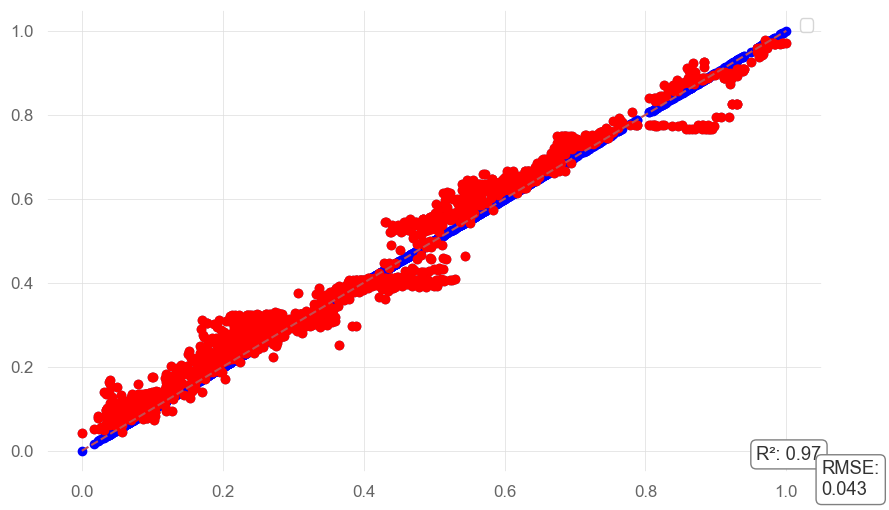

In [ ]:
model = KNeighborsRegressor()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared= False)

plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test,color='blue')
plt.scatter(y_test,y_pred,color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
box = dict(boxstyle="round, pad=0.3", fc="white", ec="gray", lw=1)
plt.text(plt.xlim()[1], plt.ylim()[0]+0.02, f"R²: {r2:.2f}", ha='right', va='bottom', wrap = True, bbox = box)
plt.text(plt.xlim()[1], plt.ylim()[0]*0.85 + 0.02, f"RMSE: {rmse:.3f}", ha='left', va='top', wrap = True, bbox = box) 

plt.legend()
plt.show()


In [ ]:
model.score(X_test, y_pred)

1.0

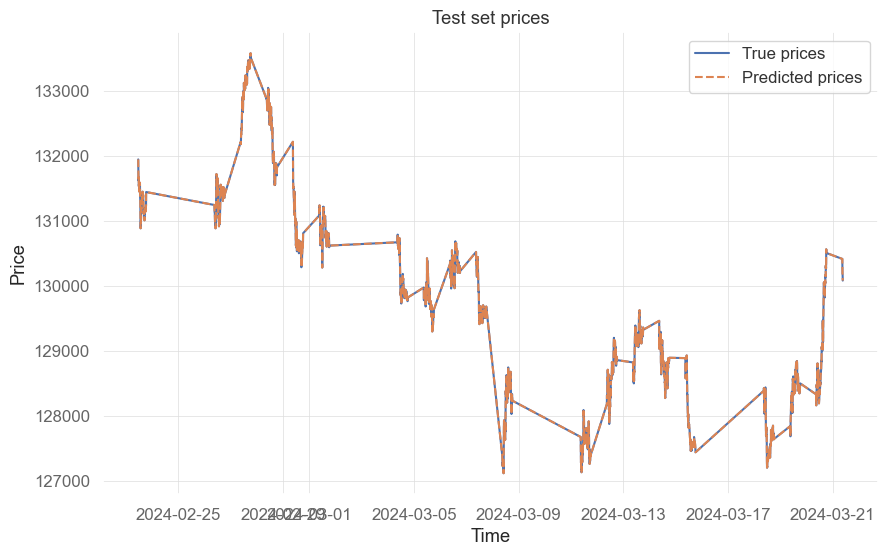

In [ ]:
dados_teste = np.column_stack((X_test,y_test))
dados_preditos = np.column_stack((X_test,y_pred ))

precos_teste_real = scaler.inverse_transform(dados_teste)
precos_teste_preditos = scaler.inverse_transform(dados_preditos)
data_teste = data.iloc[5330:]

fig, ax = plt.subplots()
ax.plot(data_teste, precos_teste_real[:, 0], label='True prices')
ax.plot(data_teste, precos_teste_preditos[:, 0], linestyle='--', label='Predicted prices')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Test set prices')
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


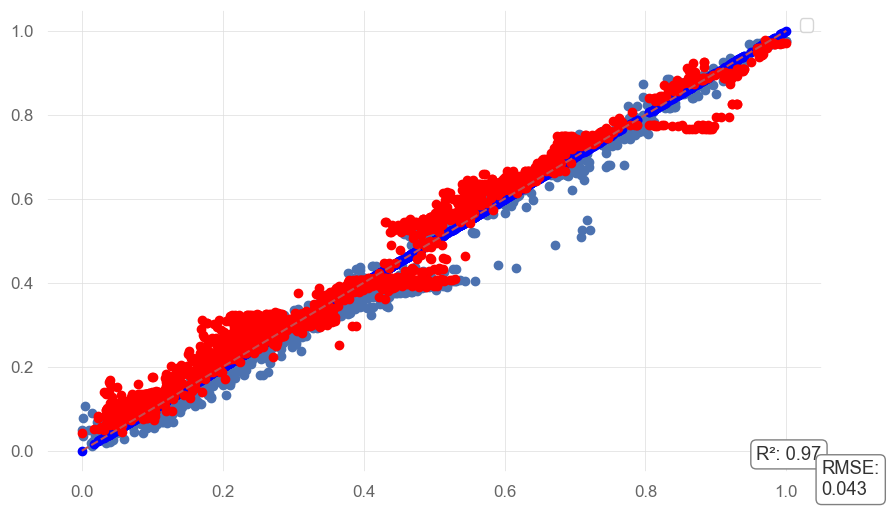

In [ ]:
dados2 = pd.read_excel(r'C:\Users\lauro.telles\Desktop\Web Scrapping\Modelo Preditivo cotações\Dados Intraday Brasil DOL  e  INDICE.xlsx',3
                       )

dados2

new_dados_invertidos = dados2[::-1].reset_index(drop='index')
new_dados_invertidos.dropna()

data = new_dados_invertidos.iloc[:-49,0]
new_dados_invertidos = new_dados_invertidos.iloc[:,1:]
new_dados_invertidos=new_dados_invertidos.iloc[:,[3,1,2,3,4,5,6,7,8,9,10,11,12,13]].dropna()

new_train_scaled=scaler.fit_transform(new_dados_invertidos)


new_X_train = new_train_scaled[:,1:]
new_y_train = new_train_scaled[:,0]

new_y_pred = model.predict(new_X_train)

new_r2 = r2_score(new_y_train,new_y_pred)

new_rmse = mean_squared_error(new_y_train,new_y_pred,squared= False)

plt.scatter(new_y_train,new_y_pred)
plt.scatter(y_test,y_test,color='blue')
plt.scatter(y_test,y_pred,color='red')
plt.plot([new_y_train.min(), new_y_train.max()], [new_y_train.min(), new_y_train.max()], 'r--')
box = dict(boxstyle="round, pad=0.3", fc="white", ec="gray", lw=1)
plt.text(plt.xlim()[1], plt.ylim()[0]+0.02, f"R²: {r2:.2f}", ha='right', va='bottom', wrap = True, bbox = box)
plt.text(plt.xlim()[1], plt.ylim()[0]*0.85 + 0.02, f"RMSE: {rmse:.3f}", ha='left', va='top', wrap = True, bbox = box) 

plt.legend()
plt.show()





